# Recoding Data

## Preliminaries
I include the data import and library import commands at the start of each lesson so that the lessons are self-contained.

In [3]:
import pandas as pd
bank = pd.read_csv('Data/Bank.csv')

## Appending a column
As in R, we can add a column ("Series") to our Pandas data frame.  In the code below, I add a new column called "Dummy" and set every value in the series to zero.

In [4]:
bank['Dummy'] = 0
bank.head()

,Employee,EducLev,JobGrade,YrHired,YrBorn,Gender,YrsPrior,PCJob,Salary,Dummy
0,1,3,1,92,69,Male,1,No,32.0,0
1,2,1,1,81,57,Female,1,No,39.1,0
2,3,1,1,83,60,Female,0,No,33.2,0
3,4,2,1,87,55,Female,7,No,30.6,0
4,5,3,1,92,67,Male,0,No,29.0,0


Setting all values of "Dummy" to a constant value is not very useful, so I can drop the column using the `drop` method. Like many functions in Pandas, drop requires an `axis` argument (where 0=row and 1=column).  The `inplace = True` argument is also common in Pandas: it is equivalent to `bank = bank.drop(...)`.  That is, it ensures the changes are not part of a new data frame but are written back to the original data frame.

In [5]:
bank.drop('Dummy', axis=1, inplace=True)
bank.head()

,Employee,EducLev,JobGrade,YrHired,YrBorn,Gender,YrsPrior,PCJob,Salary
0,1,3,1,92,69,Male,1,No,32.0
1,2,1,1,81,57,Female,1,No,39.1
2,3,1,1,83,60,Female,0,No,33.2
3,4,2,1,87,55,Female,7,No,30.6
4,5,3,1,92,67,Male,0,No,29.0


## Recoding using the ternary operator
Recoding is easy in R because R naturally manages arrays and vectors.  Based on our experience with R, we might expect the following expression to work.  The core of the expression is Python's inline `if` statement (or ternary operator), which takes the form:
`<return value if true> if <logical expression> else <return value if false>`

To remap "Female" and "Male" to 1 and 0, we might think we could use the following ternary operator:
`1 if bank['Gender'] == "Female" else 0`

Unfortunately, although this approach works magically in R, it does not work in Python.  This is because the ternary operator does not work on the entire bank\['Gender'\] series.  Of course, we have some alternatives.

### The numpy where method
Numpy is another useful Python library (which means it has to be imported before it is used in our code).  Its `where()` method works the same as the ternary operator, except it works with arrays of data:
`where(<logical condition>, <value if true>, <value if false>)`

In [6]:
import numpy as np
bank['GenderDummy_F'] = np.where(bank['Gender'] == "Female", 1, 0)
bank.head()

,Employee,EducLev,JobGrade,YrHired,YrBorn,Gender,YrsPrior,PCJob,Salary,GenderDummy_F
0,1,3,1,92,69,Male,1,No,32.0,0
1,2,1,1,81,57,Female,1,No,39.1,1
2,3,1,1,83,60,Female,0,No,33.2,1
3,4,2,1,87,55,Female,7,No,30.6,1
4,5,3,1,92,67,Male,0,No,29.0,0


### Applying a function
Pandas has a special method called `apply()` which applies an expression to each element of the Series object.  Which expression?  The easiest way to see how this works is to start with a parameterized function that implements the if/then logic.  What follows is a standard function declaration in Python.  The code defines a new function called "my_recode" which takes a single parameter "gender".  The function returns a 1 or 0 depending on the value passed to it:

In [7]:
def my_recode(gender):
    if gender == "Female":
        return 1
    else:
        return 0

Once defined, we can call the function anywhere within our notebook.  The code below tests the function over the expect range of inputs.  We see that we get 1 and 0 in response, as expected:

In [8]:
my_recode("Female"), my_recode("Male")

(1, 0)

Now we can use the Pandas `apply()` method to call the function for each value of the "Gender" column:

In [9]:
bank['GenderDummy_F'] = bank['Gender'].apply(my_recode)
bank.head()

,Employee,EducLev,JobGrade,YrHired,YrBorn,Gender,YrsPrior,PCJob,Salary,GenderDummy_F
0,1,3,1,92,69,Male,1,No,32.0,0
1,2,1,1,81,57,Female,1,No,39.1,1
2,3,1,1,83,60,Female,0,No,33.2,1
3,4,2,1,87,55,Female,7,No,30.6,1
4,5,3,1,92,67,Male,0,No,29.0,0


### Applying a lambda function
A slightly more elegant approach is to apply a _lambda_ function in Python.  A lambda function is simply a short, anonymous (unnamed), inline function.  It saves us from having to define a separate function (as we did with `my_recode`).  In addition, the lambda function makes the argument (in this case _x_) explicit.  The explicit, non-array argument allows us to use the ternary operator:

In [10]:
bank['GenderDummy_F'] = bank['Gender'].apply(lambda x: 1 if x == "Female" else 0)
bank.head()

,Employee,EducLev,JobGrade,YrHired,YrBorn,Gender,YrsPrior,PCJob,Salary,GenderDummy_F
0,1,3,1,92,69,Male,1,No,32.0,0
1,2,1,1,81,57,Female,1,No,39.1,1
2,3,1,1,83,60,Female,0,No,33.2,1
3,4,2,1,87,55,Female,7,No,30.6,1
4,5,3,1,92,67,Male,0,No,29.0,0


The obvious advantage with the `apply()` method is that the function (be it explicitly named or lambda) can be arbitrarily complex.

## Replacing values from a list
Pandas has a `replace()` method that can take lists.  For example, we could create a list of job grades (1-6) and a corresponding list of "managerial status" for each of the job grades.  Thus, when the `replace()` method sees a job grade of 1, it replaces it with the corresponding value in the other list.

In [11]:
grades = [1,2,3,4,5,6]
status = ["non-mgmt", "non-mgmt", "non-mgmt", "non-mgmt", "mgmt", "mgmt"]

bank['Manager'] = bank['JobGrade'].replace(grades, status)
bank[170:175]

,Employee,EducLev,JobGrade,YrHired,YrBorn,Gender,YrsPrior,PCJob,Salary,GenderDummy_F,Manager
170,171,2,4,79,42,Female,1,No,45.5,1,non-mgmt
171,172,3,4,84,58,Female,0,No,44.5,1,non-mgmt
172,173,2,4,82,55,Female,2,No,51.2,1,non-mgmt
173,174,5,5,88,61,Male,0,No,47.5,0,mgmt
174,175,5,5,87,58,Female,0,No,44.5,1,mgmt


Here I create a list of six job grades and six managerial statuses (the lists have to be the same length and the _i_ th job grade has to correspond to the _i_ th managerial status).  Since the `inline = True` argument is not passed to `replace()`, no change is made to the underlying "Job Grade" column.  Instead, I assign the output of the `replace()` method to a new column called "Manager".

Instead of calling `head()` (or `tail()`) to preview the results, I use Python's slice to show rows 170-175.  This gives me a sample of managerial and non-managerial employees.

Of course, it doesn't take much imagination to see how the `replace()` function could be used to create dummy variables.  Returning to the "Gender" example:

In [12]:
genders=["Female", "Male"]
dummy_vars=[1,0]

bank['GenderDummy_F'] = bank['Gender'].replace(genders, dummy_vars)
bank.head()

,Employee,EducLev,JobGrade,YrHired,YrBorn,Gender,YrsPrior,PCJob,Salary,GenderDummy_F,Manager
0,1,3,1,92,69,Male,1,No,32.0,0,non-mgmt
1,2,1,1,81,57,Female,1,No,39.1,1,non-mgmt
2,3,1,1,83,60,Female,0,No,33.2,1,non-mgmt
3,4,2,1,87,55,Female,7,No,30.6,1,non-mgmt
4,5,3,1,92,67,Male,0,No,29.0,0,non-mgmt


## Logging variables
As we have seen, we occasionally want to transform a numerical column in order to increase the linearity of out models.  For this, we can use the numpy `log()` function, which returns the natural (base $e$) logarithm:

In [17]:
bank['logSalary'] = np.log(bank['Salary'])

If we want, we can plot the results. In this case, a log transform does not really improve the normality of the salary data.  The underlying issue appears to be bimodality&mdash;there are actually two salary distributions: workers and managers.

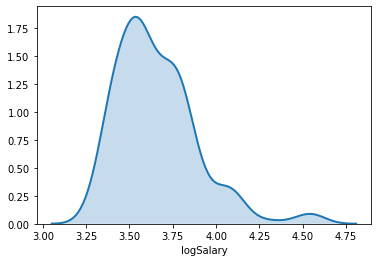

In [18]:
import seaborn as sns
sns.distplot(bank['logSalary'], hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 2});